# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who:
   - have a **low total_claim_amount** (e.g., below $1,000),
   - have a response "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [1]:
# your code goes here
import pandas as pd

# 1. Load the data
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
df = pd.read_csv(url)

# 2. Filter the data (simple one-step filtering)
filtered_df = df[
    (df['Total Claim Amount'] < 1000) & 
    (df['Response'] == 'Yes')
].copy()

# 3. Show results
print(f"Original dataset: {len(df)} customers")
print(f"Filtered dataset: {len(filtered_df)} customers")
print("\nFirst 5 filtered customers:")
print(filtered_df.head())

Original dataset: 10910 customers
Filtered dataset: 1399 customers

First 5 filtered customers:
    Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
3            3  XL78013      Oregon             22332.439460      Yes   
8            8  FM55990  California              5989.773931      Yes   
15          15  CW49887  California              4626.801093      Yes   
19          19  NJ54277  California              3746.751625      Yes   
27          27  MQ68407      Oregon              4376.363592      Yes   

    Coverage Education Effective To Date EmploymentStatus Gender  ...  \
3   Extended   College           1/11/11         Employed      M  ...   
8    Premium   College           1/19/11         Employed      M  ...   
15     Basic    Master           1/16/11         Employed      F  ...   
19  Extended   College           2/26/11         Employed      F  ...   
27   Premium  Bachelor           2/28/11         Employed      F  ...   

    Number of Open Complai

In [3]:

# 2. Filter for "Yes" responders only
responders = df[df['Response'] == 'Yes']

# 3. Calculate average metrics by policy type and gender
analysis = responders.groupby(['Policy Type', 'Gender']).agg({
    'Monthly Premium Auto': 'mean',
    'Customer Lifetime Value': 'mean',
    'Total Claim Amount': 'mean'
}).round(2)

# 4. Calculate profit estimate (Premium - Claims)
analysis['Estimated Profit'] = analysis['Monthly Premium Auto'] - analysis['Total Claim Amount']

# 5. Sort by most profitable segments
profit_ranking = analysis.sort_values('Estimated Profit', ascending=False)

print("=== Customer Segment Analysis ===")
print(profit_ranking)

=== Customer Segment Analysis ===
                       Monthly Premium Auto  Customer Lifetime Value  \
Policy Type    Gender                                                  
Corporate Auto M                      92.19                  7944.47   
               F                      94.30                  7712.63   
Special Auto   M                      86.34                  8247.09   
Personal Auto  F                      99.00                  8339.79   
Special Auto   F                      92.31                  7691.58   
Personal Auto  M                      91.09                  7448.38   

                       Total Claim Amount  Estimated Profit  
Policy Type    Gender                                        
Corporate Auto M                   408.58           -316.39  
               F                   433.74           -339.44  
Special Auto   M                   429.53           -343.19  
Personal Auto  F                   452.97           -353.97  
Special Auto   F 

=== States with >500 Customers ===
        State  Customer Count
0  California            3552
1      Oregon            2909
2     Arizona            1937
3      Nevada             993
4  Washington             888


<Axes: title={'center': 'States with Most Customers (>500)'}, ylabel='State'>

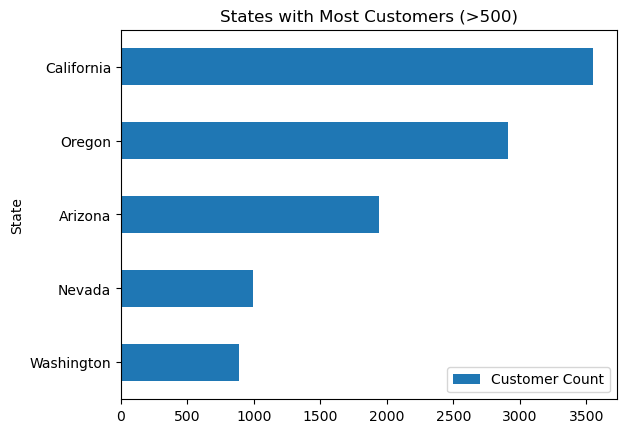

In [5]:
# 2. Count customers by state
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Customer Count']  # Rename columns

# 3. Filter for states with >500 customers
popular_states = state_counts[state_counts['Customer Count'] > 500]

# 4. Show results
print("=== States with >500 Customers ===")
print(popular_states.sort_values('Customer Count', ascending=False))

# Optional: Simple bar chart
popular_states.sort_values('Customer Count').plot(
    kind='barh',
    x='State',
    y='Customer Count',
    title='States with Most Customers (>500)'
)

In [8]:
# 2. Calculate statistics
clv_stats = df.groupby(['Education', 'Gender'])['Customer Lifetime Value'].agg(
    ['max', 'min', 'median']
).round(2).reset_index()

# 3. Show results
print("=== Customer Lifetime Value Analysis ===")
print(clv_stats.sort_values('median', ascending=False))

# 4. Simple conclusions
print("\nKey Conclusions:")
print("- Highest median CLV group:", 
      clv_stats.loc[clv_stats['median'].idxmax(), ['Education', 'Gender']].values)
print("- Lowest median CLV group:", 
      clv_stats.loc[clv_stats['median'].idxmin(), ['Education', 'Gender']].values)


=== Customer Lifetime Value Analysis ===
              Education Gender       max      min   median
7  High School or Below      M  83325.38  1940.98  6286.73
6  High School or Below      F  55277.45  2144.92  6039.55
3               College      M  61134.68  1918.12  6005.85
8                Master      F  51016.07  2417.78  5729.86
0              Bachelor      F  73225.96  1904.00  5640.51
2               College      F  61850.19  1898.68  5623.61
9                Master      M  50568.26  2272.31  5579.10
5                Doctor      M  32677.34  2267.60  5577.67
1              Bachelor      M  67907.27  1898.01  5548.03
4                Doctor      F  44856.11  2395.57  5332.46

Key Conclusions:
- Highest median CLV group: ['High School or Below' 'M']
- Lowest median CLV group: ['Doctor' 'F']
